In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# フォントの設定（日本語表示のため）
plt.rcParams['font.family'] = 'Hiragino Sans'  # Macの場合
# plt.rcParams['font.family'] = 'Yu Gothic'  # Windowsの場合

# データの作成
prefectures = [
    '北海道', '青森県', '岩手県', '宮城県', '秋田県', '山形県', '福島県',
    '茨城県', '栃木県', '群馬県', '埼玉県', '千葉県', '東京都', '神奈川県',
    '新潟県', '富山県', '石川県', '福井県', '山梨県', '長野県', '岐阜県',
    '静岡県', '愛知県', '三重県', '滋賀県', '京都府', '大阪府', '兵庫県',
    '奈良県', '和歌山県', '鳥取県', '島根県', '岡山県', '広島県', '山口県',
    '徳島県', '香川県', '愛媛県', '高知県', '福岡県', '佐賀県', '長崎県',
    '熊本県', '大分県', '宮崎県', '鹿児島県', '沖縄県'
]

np.random.seed(42)  # 再現性のため乱数シードを設定
tourist_numbers = np.random.randint(100, 10000, 47)  # 100万人から1000万人の範囲でランダムに生成

# 特定の都道府県のデータを調整
tourist_numbers[prefectures.index('東京都')] = 13000  # 東京都は1300万人
tourist_numbers[prefectures.index('大阪府')] = 7000   # 大阪府は700万人
tourist_numbers[prefectures.index('京都府')] = 5500   # 京都府は550万人
tourist_numbers[prefectures.index('北海道')] = 5000   # 北海道は500万人
tourist_numbers[prefectures.index('沖縄県')] = 10000  # 沖縄県は1000万人

df = pd.DataFrame({'都道府県': prefectures, '観光客数': tourist_numbers})

print(df.head())
print(f"データの形状: {df.shape}")

  都道府県  観光客数
0  北海道  5000
1  青森県   960
2  岩手県  5490
3  宮城県  5291
4  秋田県  5834
データの形状: (47, 2)


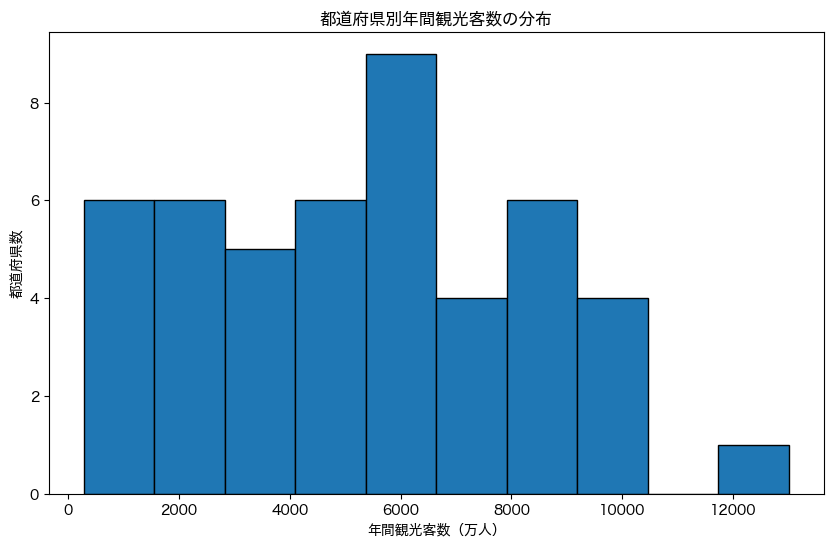

最小値: 289, 最大値: 13000


In [7]:
# 基本的なヒストグラムの作成
plt.figure(figsize=(10, 6))
plt.hist(df['観光客数'], bins=10, edgecolor='black')
plt.title('都道府県別年間観光客数の分布')
plt.xlabel('年間観光客数（万人）')
plt.ylabel('都道府県数')
plt.savefig('histogram_basic.png')
plt.show()

print(f"最小値: {df['観光客数'].min()}, 最大値: {df['観光客数'].max()}")

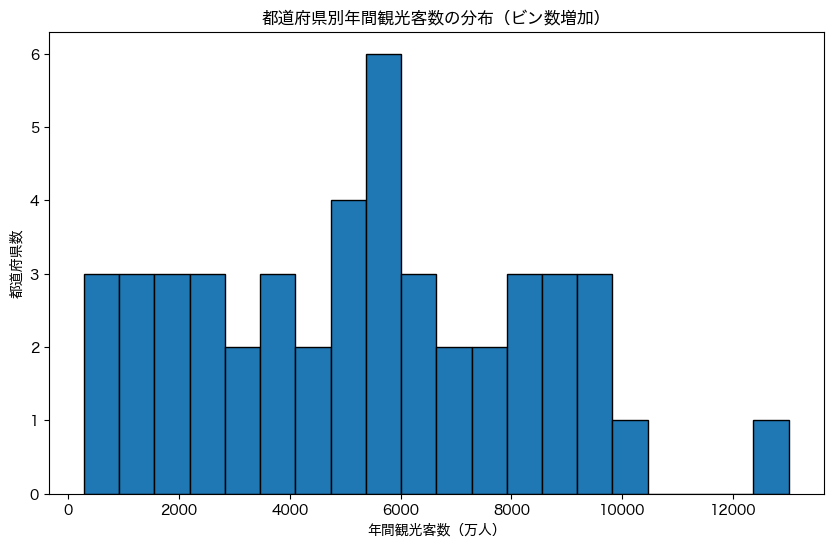

In [9]:
# ビンの数を調整したヒストグラム
plt.figure(figsize=(10, 6))
plt.hist(df['観光客数'], bins=20, edgecolor='black')
plt.title('都道府県別年間観光客数の分布（ビン数増加）')
plt.xlabel('年間観光客数（万人）')
plt.ylabel('都道府県数')
plt.savefig('histogram_more_bins.png')
plt.show()

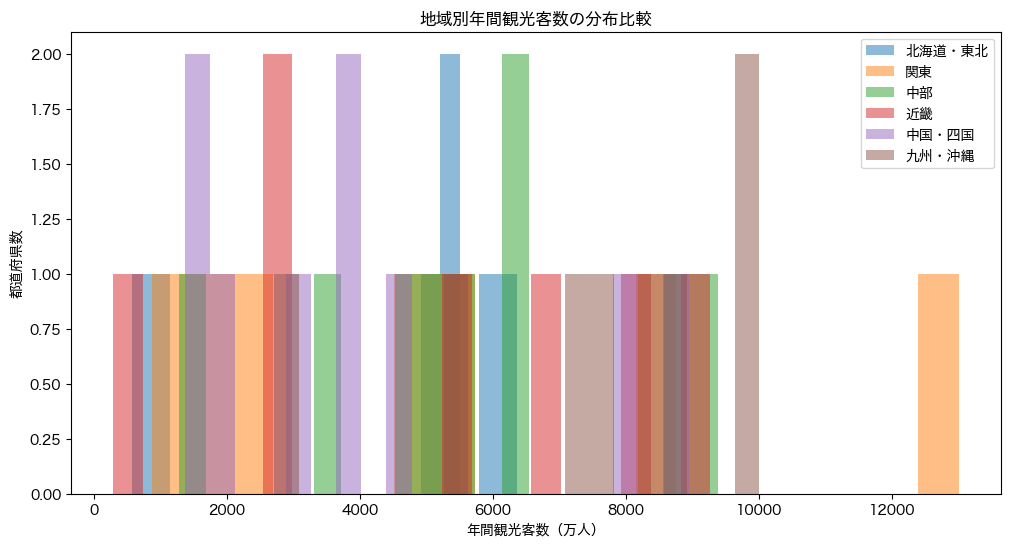

In [13]:
# 地域別データの作成
regions = {
    '北海道・東北': ['北海道', '青森県', '岩手県', '宮城県', '秋田県', '山形県', '福島県'],
    '関東': ['茨城県', '栃木県', '群馬県', '埼玉県', '千葉県', '東京都', '神奈川県'],
    '中部': ['新潟県', '富山県', '石川県', '福井県', '山梨県', '長野県', '岐阜県', '静岡県', '愛知県'],
    '近畿': ['三重県', '滋賀県', '京都府', '大阪府', '兵庫県', '奈良県', '和歌山県'],
    '中国・四国': ['鳥取県', '島根県', '岡山県', '広島県', '山口県', '徳島県', '香川県', '愛媛県', '高知県'],
    '九州・沖縄': ['福岡県', '佐賀県', '長崎県', '熊本県', '大分県', '宮崎県', '鹿児島県', '沖縄県']
}

df['地域'] = df['都道府県'].map({prefecture: region for region, prefectures in regions.items() for prefecture in prefectures})

# 地域別のヒストグラム
plt.figure(figsize=(12, 6))
for region in regions.keys():
    plt.hist(df[df['地域'] == region]['観光客数'], bins=20, alpha=0.5, label=region)

plt.title('地域別年間観光客数の分布比較')
plt.xlabel('年間観光客数（万人）')
plt.ylabel('都道府県数')
plt.legend()
plt.savefig('histogram_regions.png')
plt.show()